In [10]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [13]:
from create_data import create_data

In [14]:
cr = create_data()

In [16]:
tm_df = cr.tmsdata()

In [20]:
df = cr.tmsdata()
print(df.head(3))
df.info()
daily = df.groupby('date').agg({'revenue': 'sum', 'cost': 'sum'})
daily['margin'] = daily['revenue'] - daily['cost']
print(daily.head(3))
daily['rev_ma7'] = daily['margin'].rolling(7).mean();

         date channel campaign    segment   device   region  impressions  \
0  2024-01-01   Email     EM-6        New  Desktop    Daegu         1128   
1  2024-01-01   Email     EM-4  Returning   Mobile    Seoul         1069   
2  2024-01-01     SMS     SM-5        New   Mobile  Incheon         1032   

   clicks  cost  conversions  revenue       ctr       cvr       cpc       cac  \
0     103  3.38            3   163.94  0.091312  0.029126  0.032816  1.126667   
1      86  3.21            2    86.08  0.080449  0.023256  0.037326  1.605000   
2      94  3.10            6   262.18  0.091085  0.063830  0.032979  0.516667   

        roas  
0  48.502959  
1  26.816199  
2  84.574194  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1820 non-null   object 
 1   channel      1820 non-null   object 
 2   campaign     1820 non-null   o

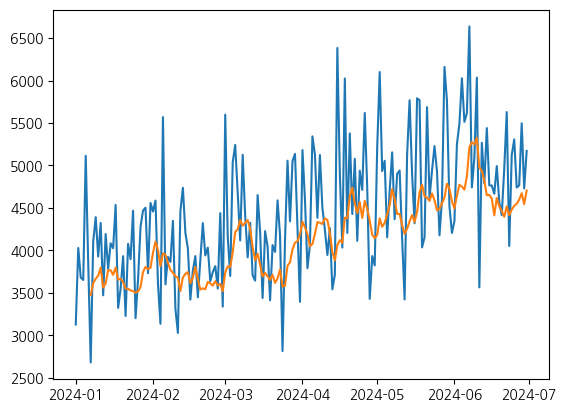

In [21]:
plt.figure()
plt.plot(daily['revenue'])
plt.plot(daily['rev_ma7'])
plt.savefig('daily_revenue_ma.png')
plt.show()
plt.close()

         clicks  impressions
channel                     
Ads       62253      2078733
Email     43124       479629
Push      41248       519648


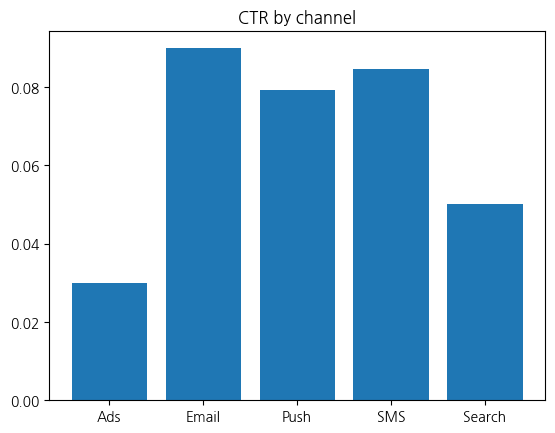

In [24]:
ctr_channel = df.groupby('channel').agg({'clicks': 'sum', 'impressions': 'sum'})
print(ctr_channel.head(3))
ctr_channel['ctr'] = ctr_channel['clicks']/ctr_channel['impressions']

plt.figure();
plt.bar(ctr_channel.index.values, ctr_channel.ctr)
plt.title("CTR by channel")
plt.savefig('ctr_channel.png')
plt.show()
plt.close()

In [27]:
import seaborn as sns
agg = df.groupby(['channel', 'campaign']).agg({'impressions': 'sum', 'revenue': 'sum', 'cost': 'sum'})

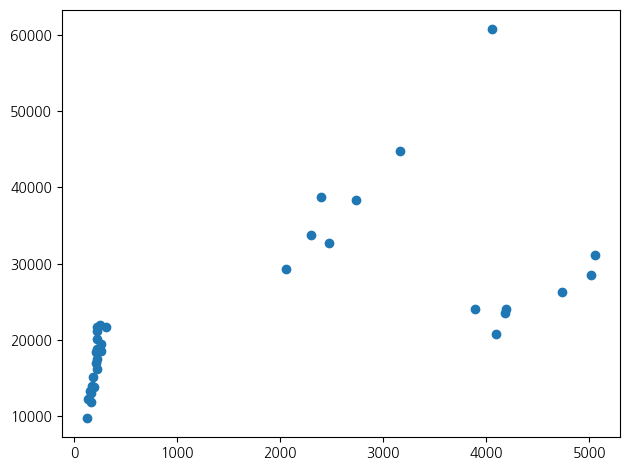

<Figure size 640x480 with 0 Axes>

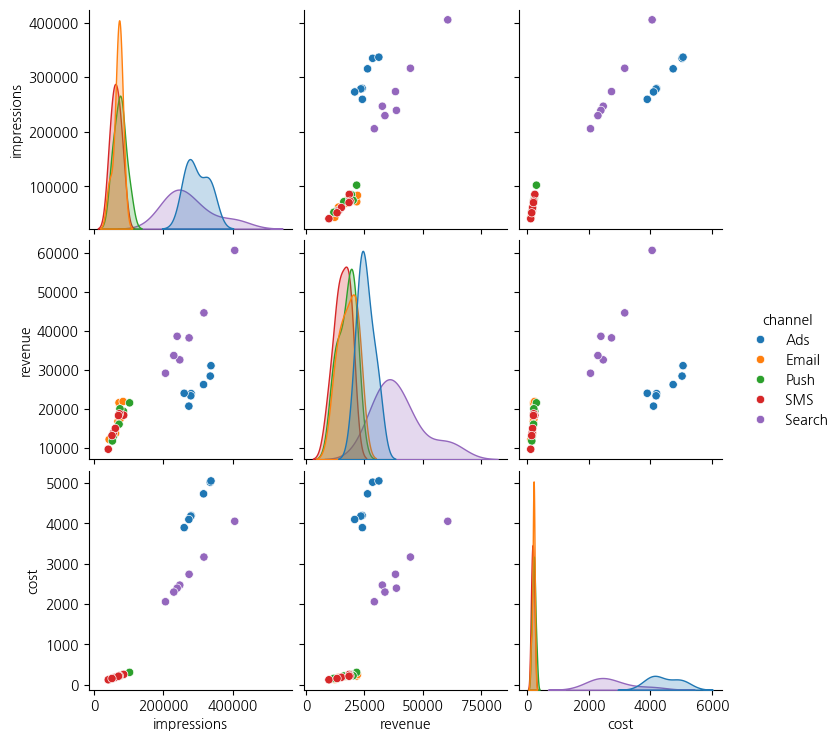

In [32]:
plt.figure()
plt.scatter(agg['cost'], agg['revenue'])
plt.tight_layout()
plt.savefig('plt_scatter.png')
plt.show()
plt.close()

agg.reset_index(inplace=True)

plt.figure()
sns.pairplot(agg, vars = ['impressions', 'revenue', 'cost'], hue='channel', diag_kind='kde')
plt.savefig('sns_pairplot.png')
plt.show()
plt.close()